20
Beam 1, box 1 in willowcreek file 3 has no data.
Beam 2, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 3.
Nothing in rebinned section for willowcreek file 3's beam 4.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


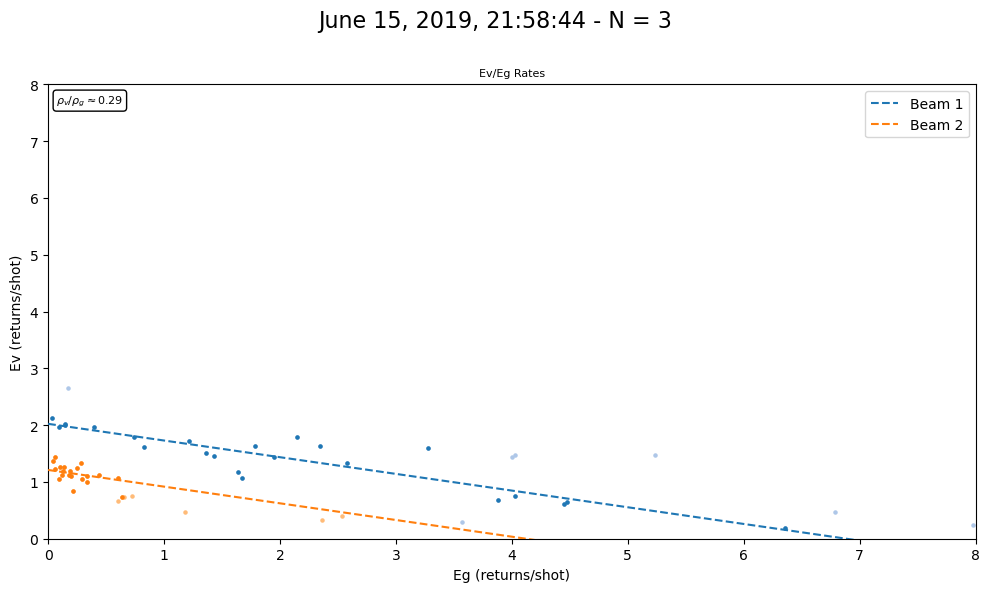

Beam 1, box 1 in willowcreek file 3 has no data.
Beam 2, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 3.
Nothing in rebinned section for willowcreek file 3's beam 4.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


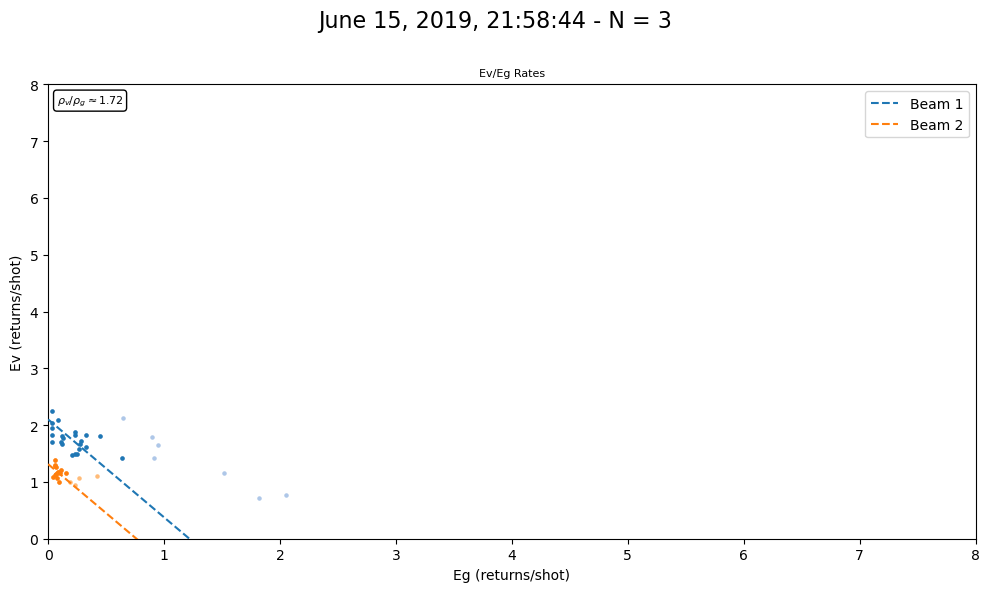

Nothing in rebinned section for willowcreek file 3's beam 1.
Nothing in rebinned section for willowcreek file 3's beam 2.
Beam 3, box 1 in willowcreek file 3 has no data.
Beam 4, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


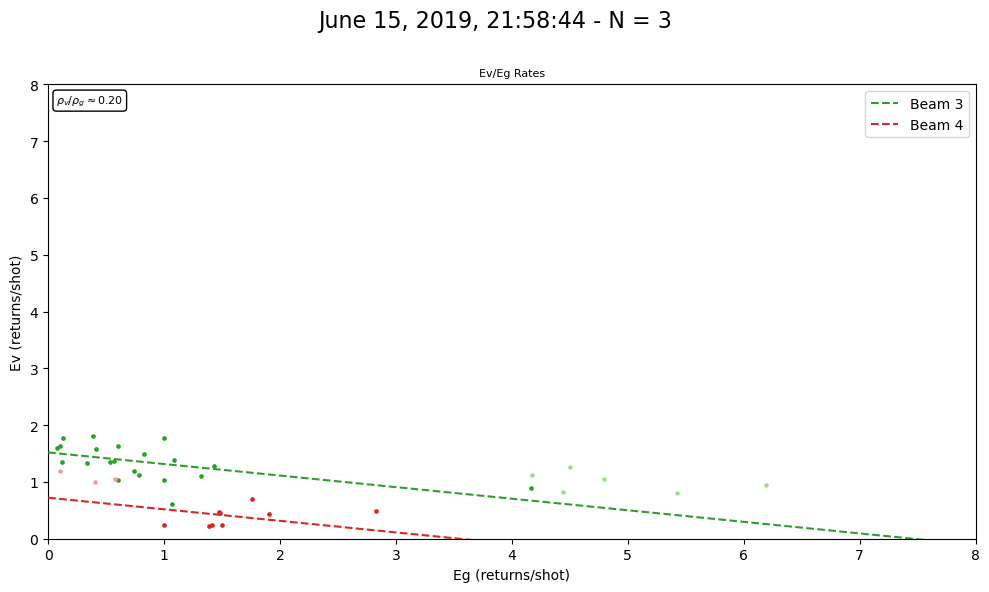

Nothing in rebinned section for willowcreek file 3's beam 1.
Nothing in rebinned section for willowcreek file 3's beam 2.
Beam 3, box 1 in willowcreek file 3 has no data.
Beam 4, box 1 in willowcreek file 3 has no data.
Nothing in rebinned section for willowcreek file 3's beam 5.
Nothing in rebinned section for willowcreek file 3's beam 6.


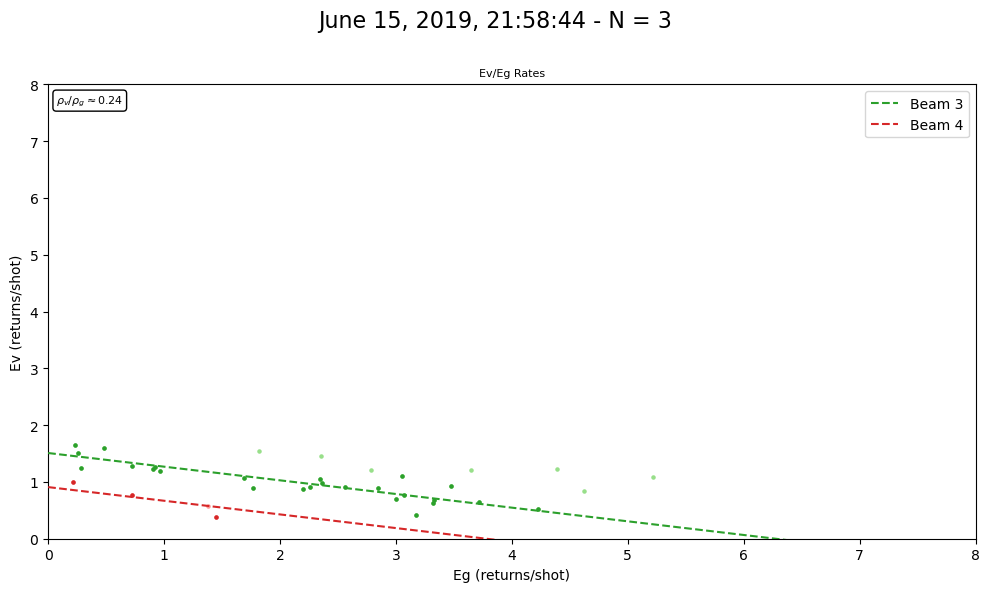

In [2]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

# coords = (-90.0791, 45.8060)
coords = [(-90.111409,45.774468),(-90.111409,45.810505),(-90.059714,45.828523),(-90.059714,45.837532)]

for i in [3]:#range(N):
    for c in coords:
        data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=c, width=.5,height=.5,file_index=i, alt_thresh=80,\
                             altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                             outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True)
        # print(data)

20
Beam 1, box 0 in willowcreek file 3 has no data.
Beam 1, box 2 in willowcreek file 3 has no data.
Beam 1, box 3 in willowcreek file 3 has no data.
Beam 1, box 4 in willowcreek file 3 has no data.
Beam 1, box 5 in willowcreek file 3 has no data.
Beam 1, box 6 in willowcreek file 3 has no data.
Beam 1, box 7 in willowcreek file 3 has no data.
Beam 1, box 8 in willowcreek file 3 has no data.
Beam 1, box 10 in willowcreek file 3 has no data.
Beam 1, box 11 in willowcreek file 3 has no data.
Beam 1, box 12 in willowcreek file 3 has no data.
Beam 1, box 13 in willowcreek file 3 has no data.
Beam 1, box 14 in willowcreek file 3 has no data.
Beam 1, box 15 in willowcreek file 3 has no data.
Beam 1, box 16 in willowcreek file 3 has no data.
Beam 1, box 18 in willowcreek file 3 has no data.
Beam 1, box 19 in willowcreek file 3 has no data.
Beam 1, box 20 in willowcreek file 3 has no data.
Beam 1, box 21 in willowcreek file 3 has no data.
Beam 1, box 22 in willowcreek file 3 has no data.
Beam 

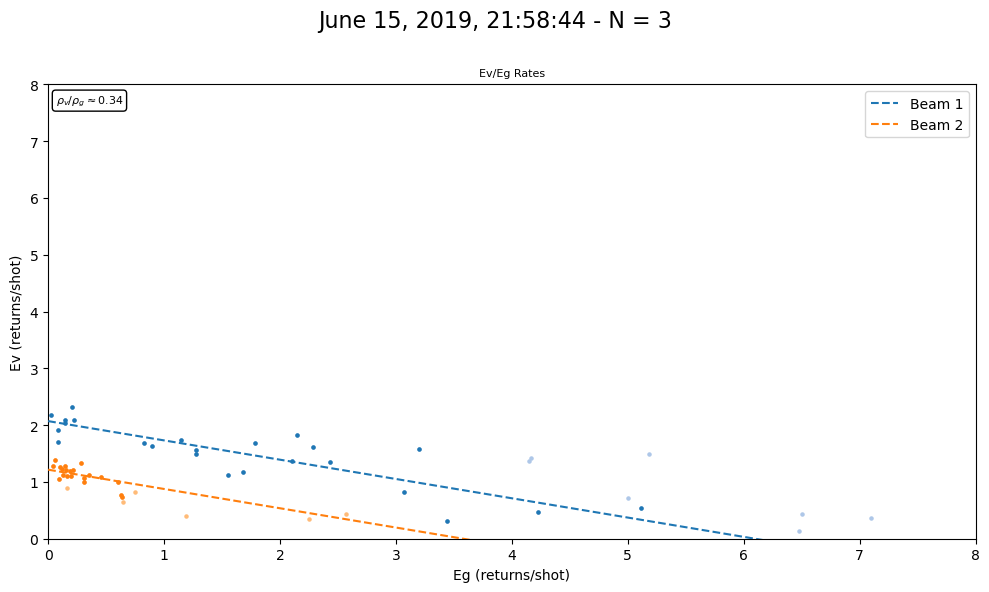

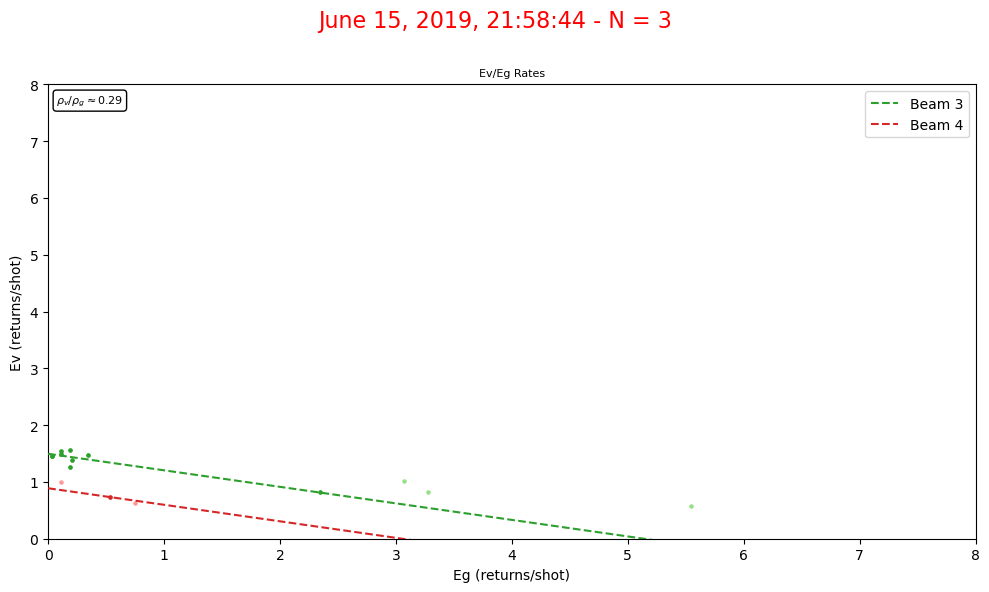

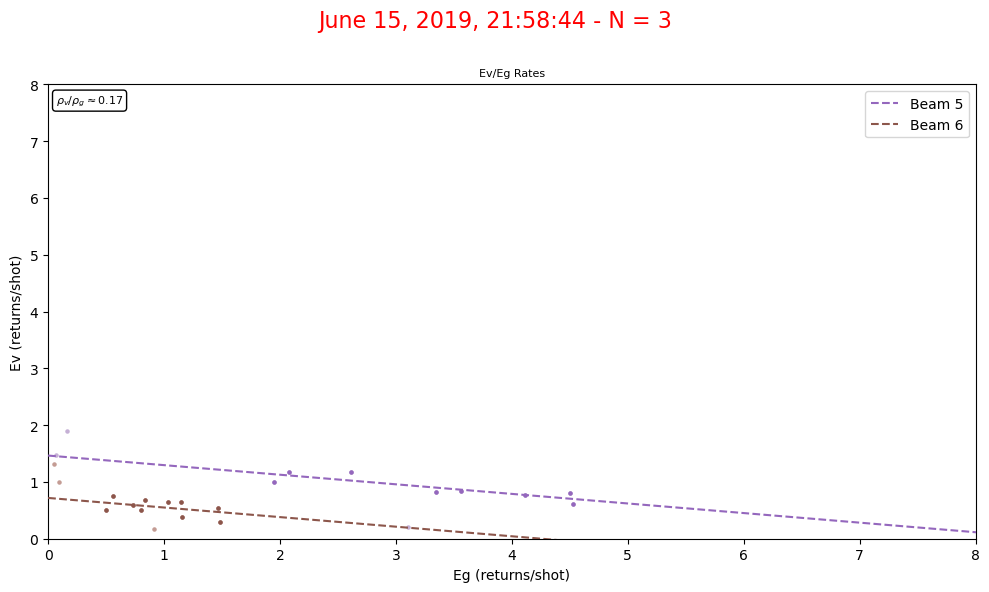

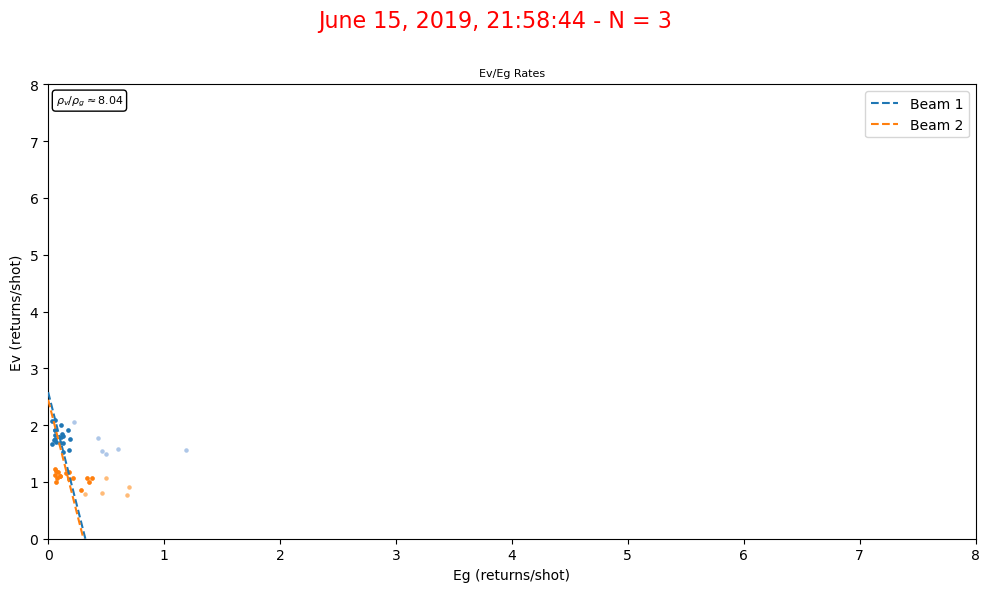

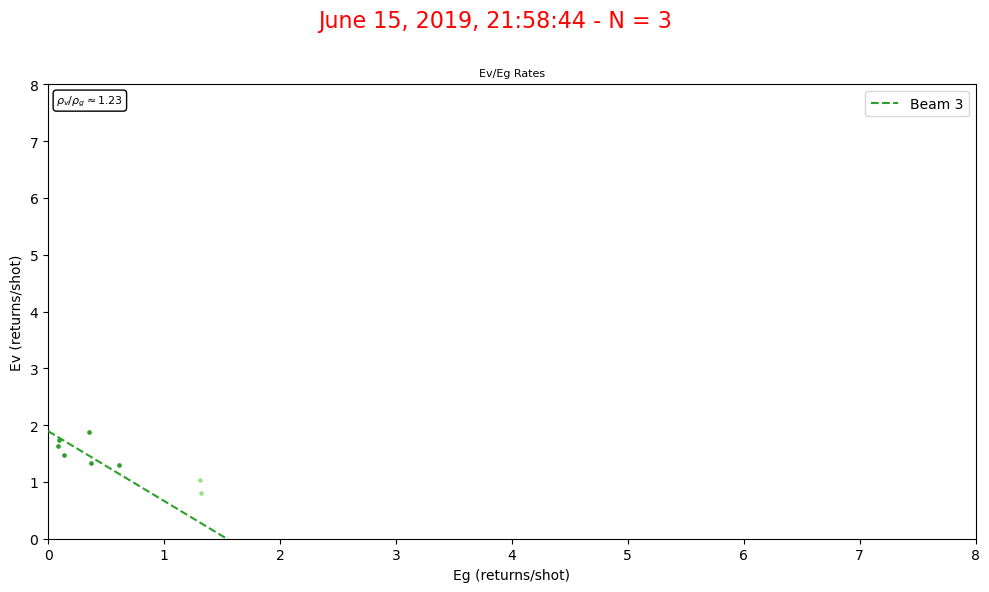

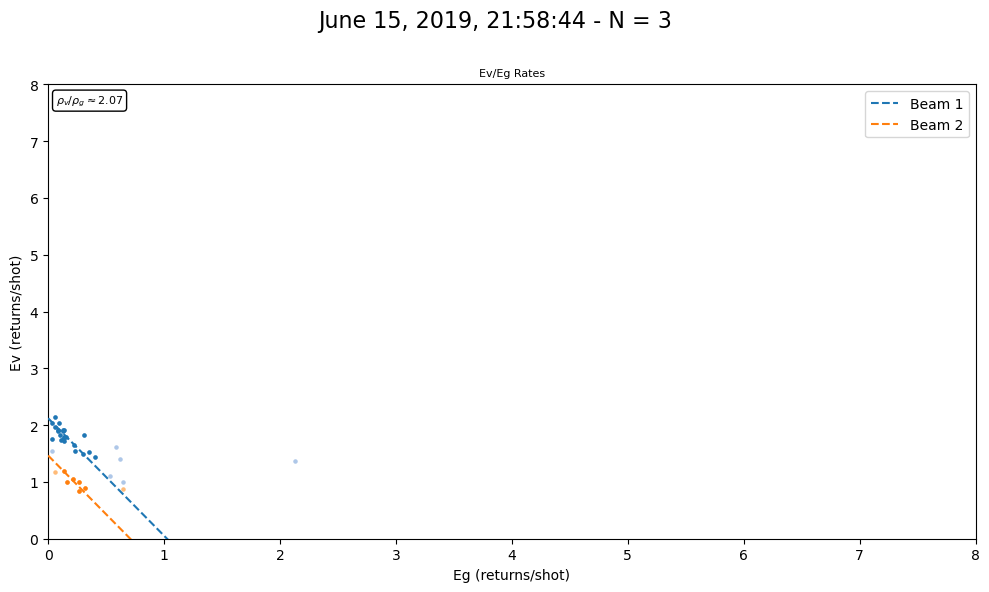

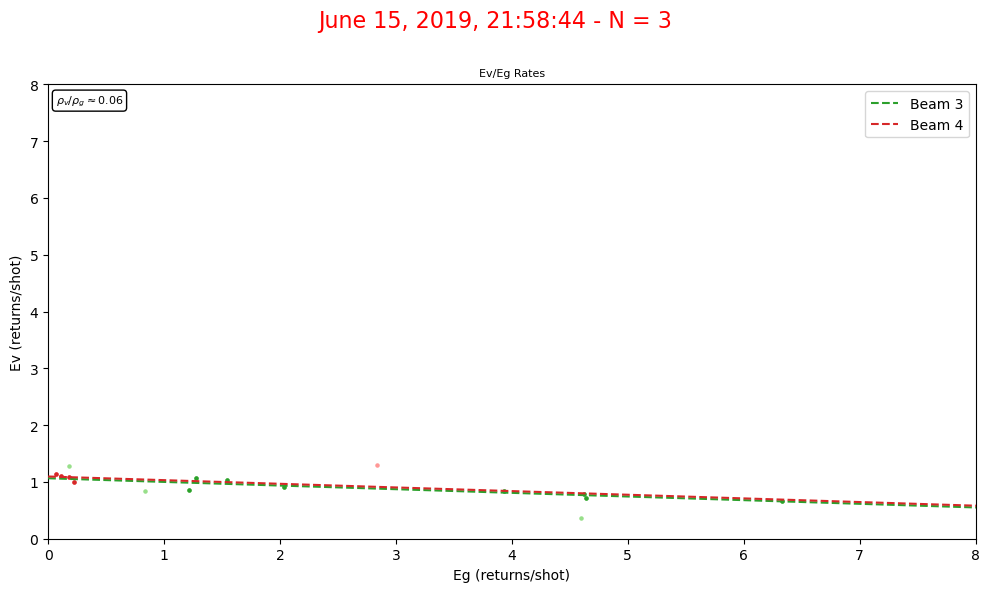

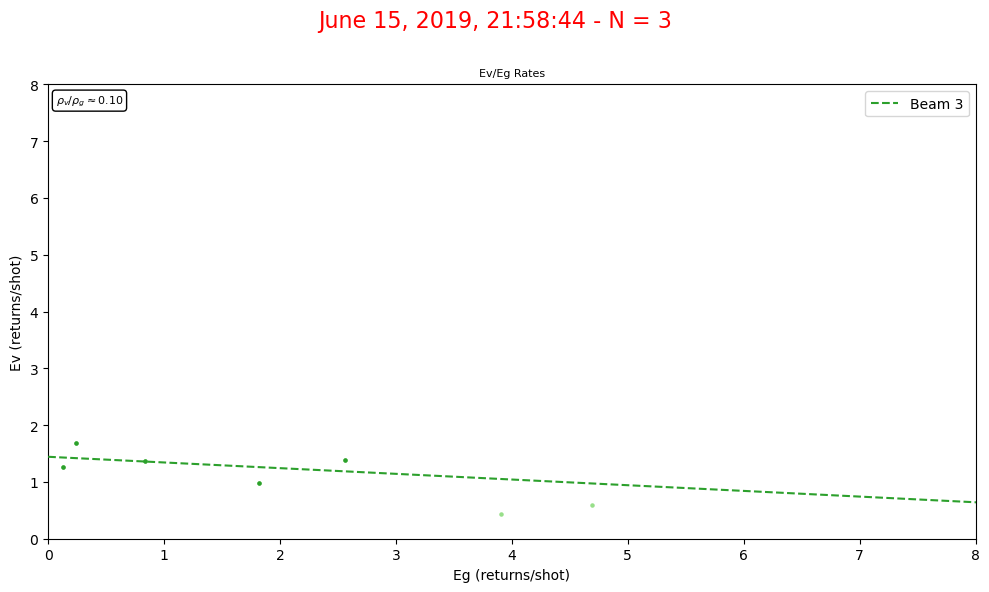

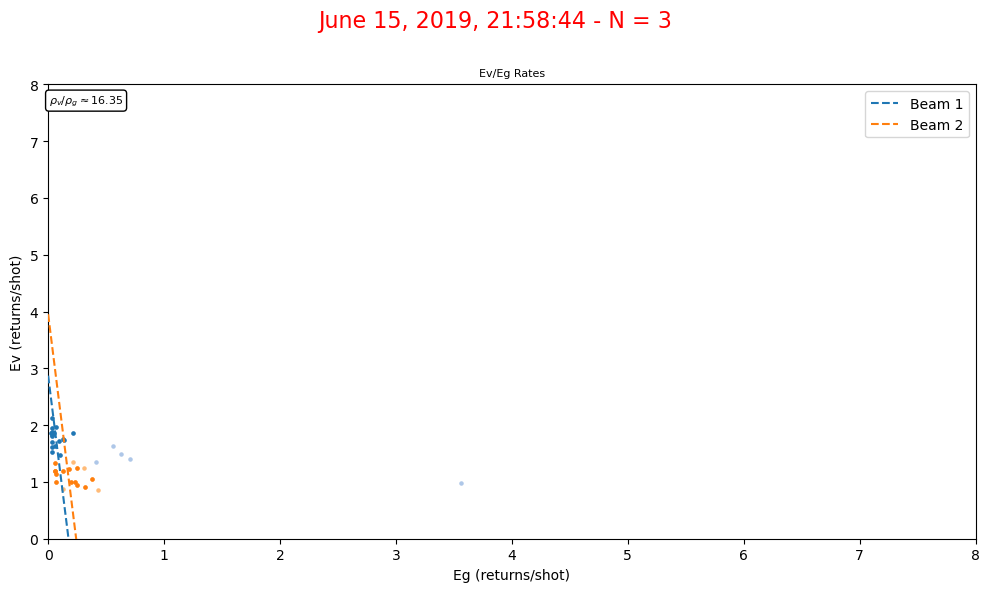

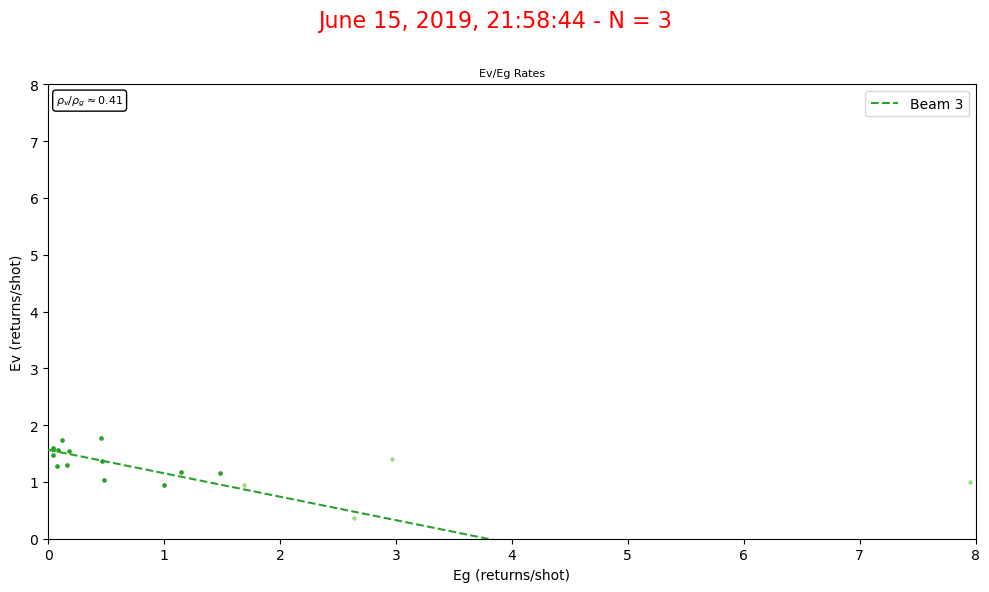

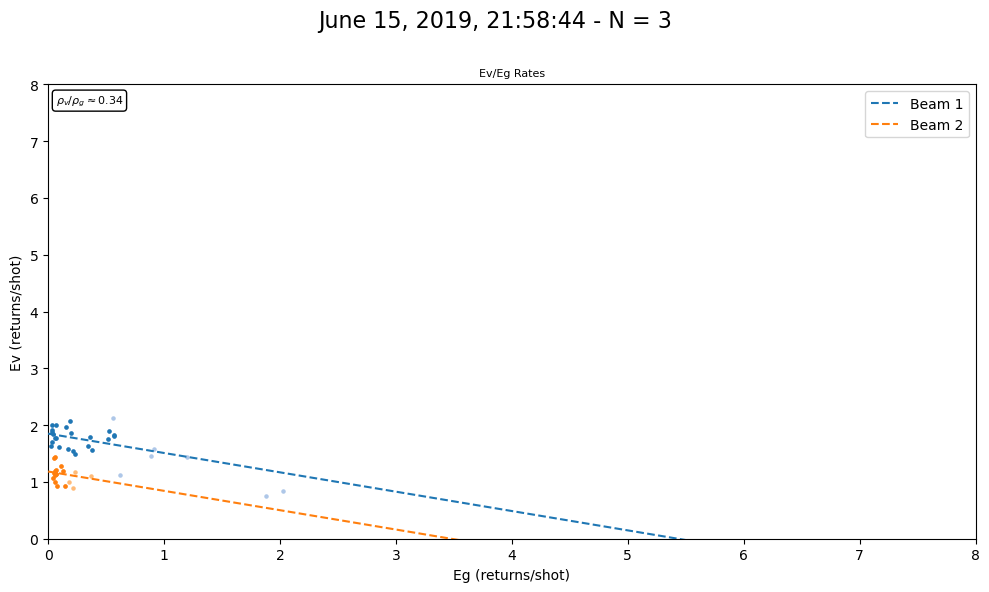

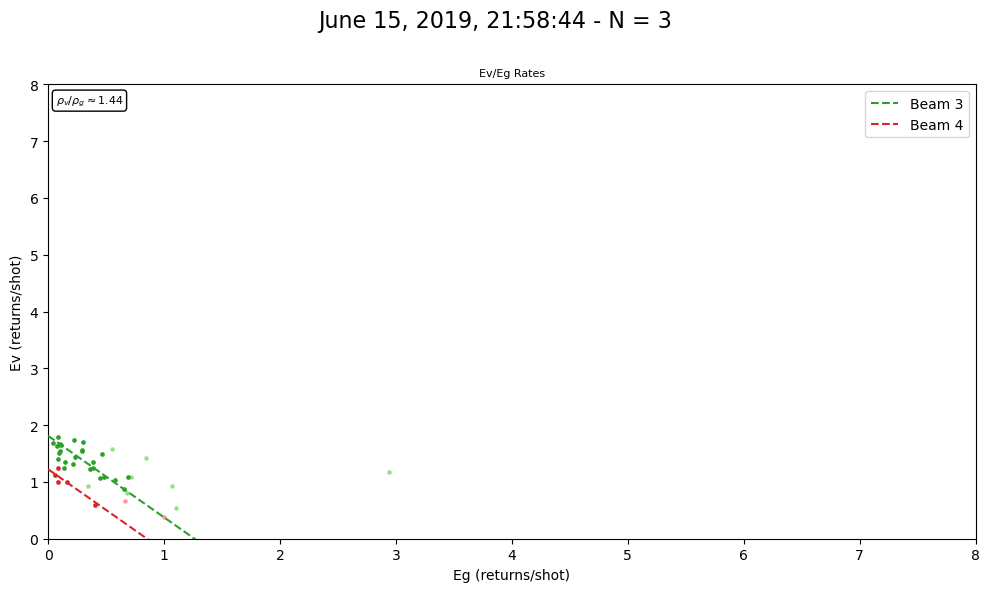

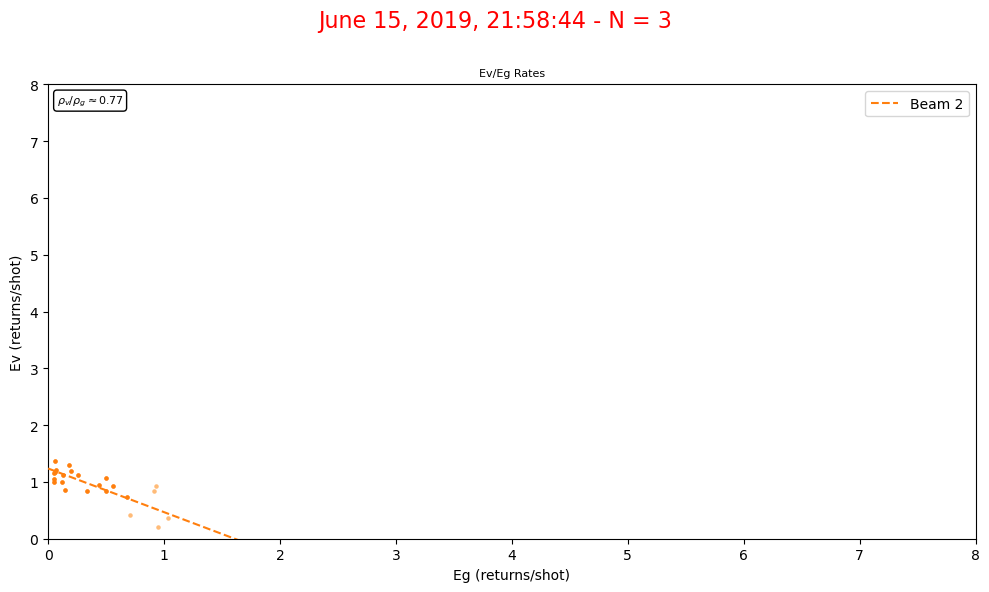

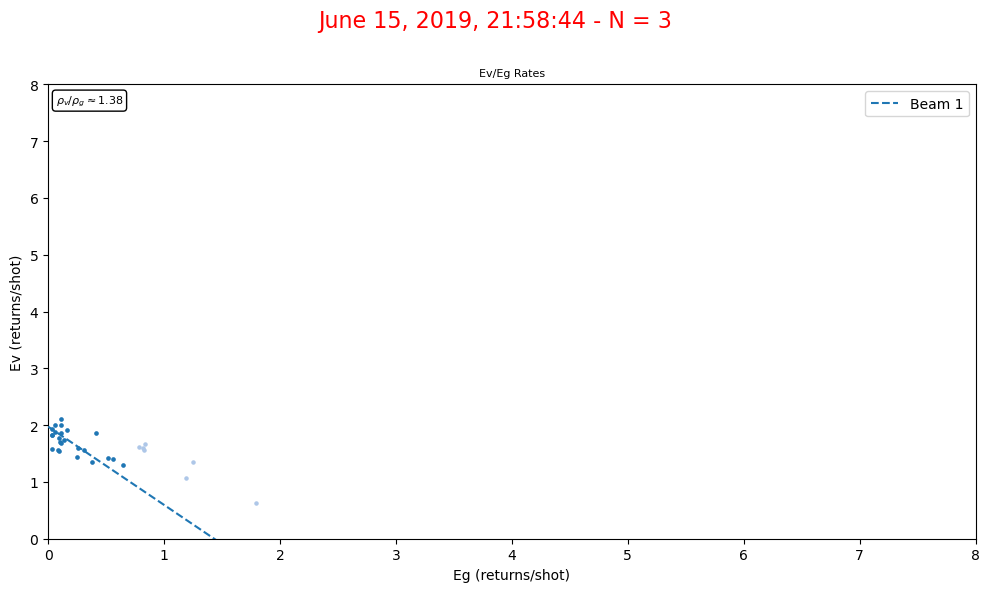

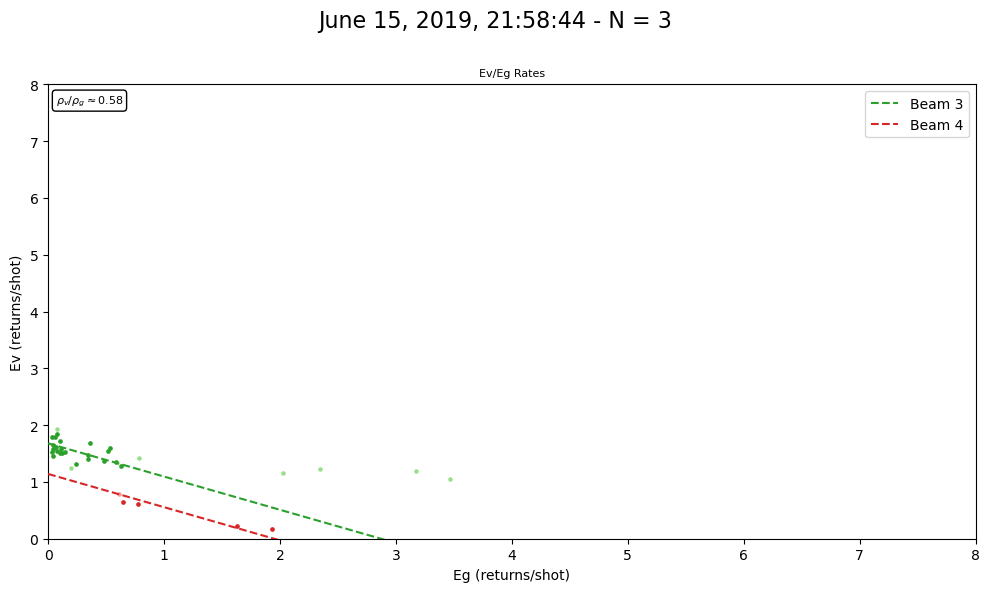

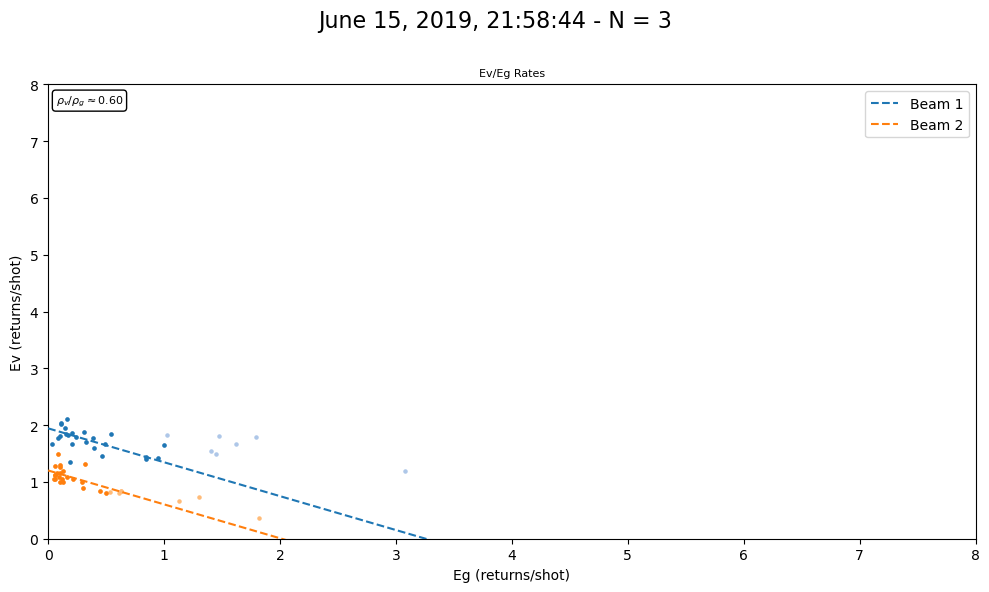

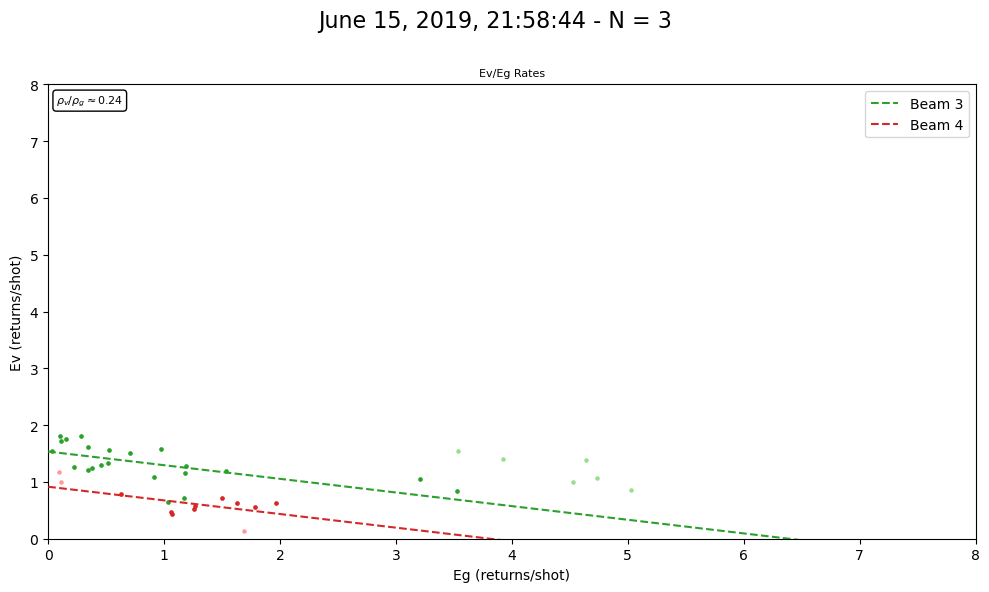

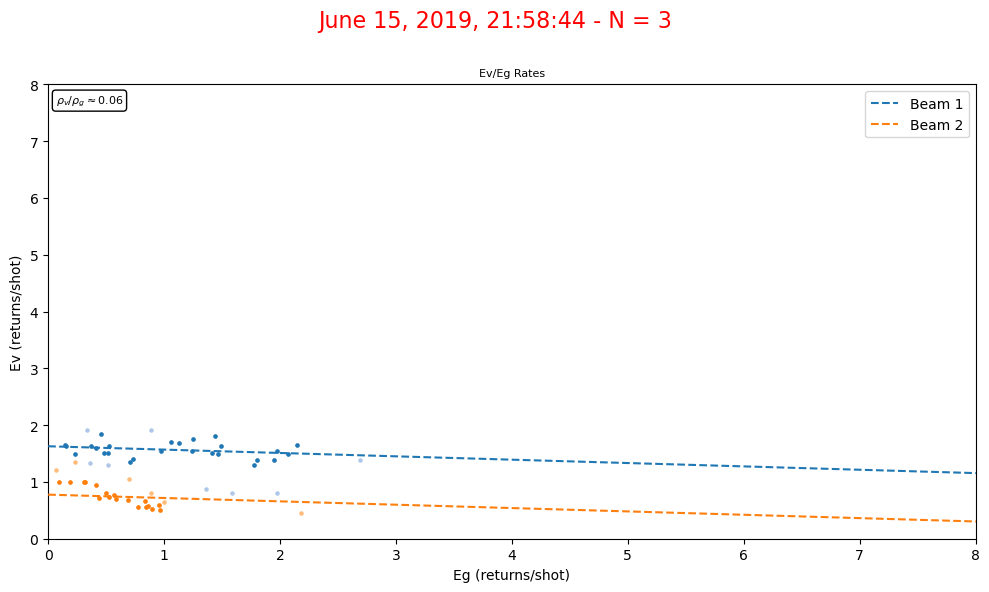

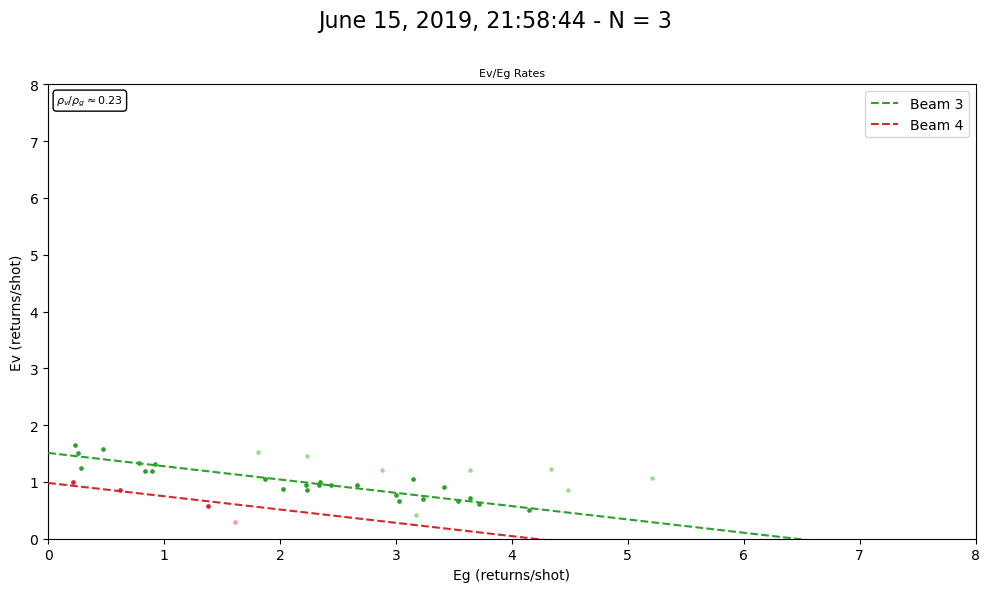

In [1]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-90.0791, 45.8060)

for i in [3]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True)
    # print(data)

20
Beam 1, box 0 in willowcreek file 17 has no data.
Beam 1, box 1 in willowcreek file 17 has no data.
Beam 1, box 2 in willowcreek file 17 has no data.
Beam 1, box 3 in willowcreek file 17 has no data.
Beam 1, box 5 in willowcreek file 17 has no data.
Beam 1, box 6 in willowcreek file 17 has no data.
Beam 1, box 7 in willowcreek file 17 has no data.
Beam 1, box 8 in willowcreek file 17 has no data.
Beam 1, box 9 in willowcreek file 17 has no data.
Beam 1, box 10 in willowcreek file 17 has no data.
Beam 1, box 11 in willowcreek file 17 has no data.
Beam 1, box 13 in willowcreek file 17 has no data.
Beam 1, box 14 in willowcreek file 17 has no data.
Beam 1, box 15 in willowcreek file 17 has no data.
Beam 1, box 16 in willowcreek file 17 has no data.
Beam 1, box 17 in willowcreek file 17 has no data.
Beam 1, box 18 in willowcreek file 17 has no data.
Beam 1, box 21 in willowcreek file 17 has no data.
Beam 1, box 22 in willowcreek file 17 has no data.
Beam 1, box 23 in willowcreek file 17

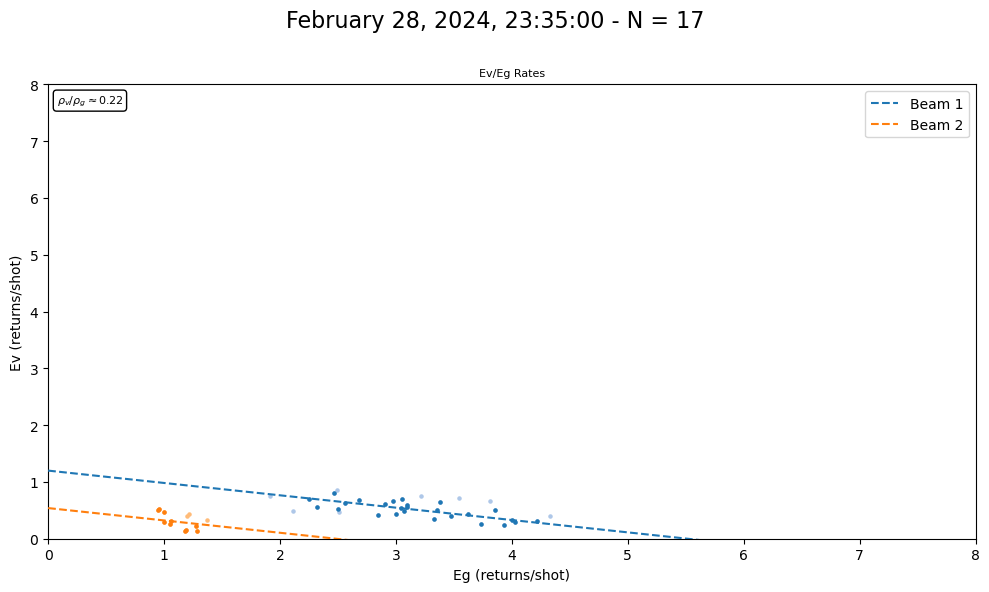

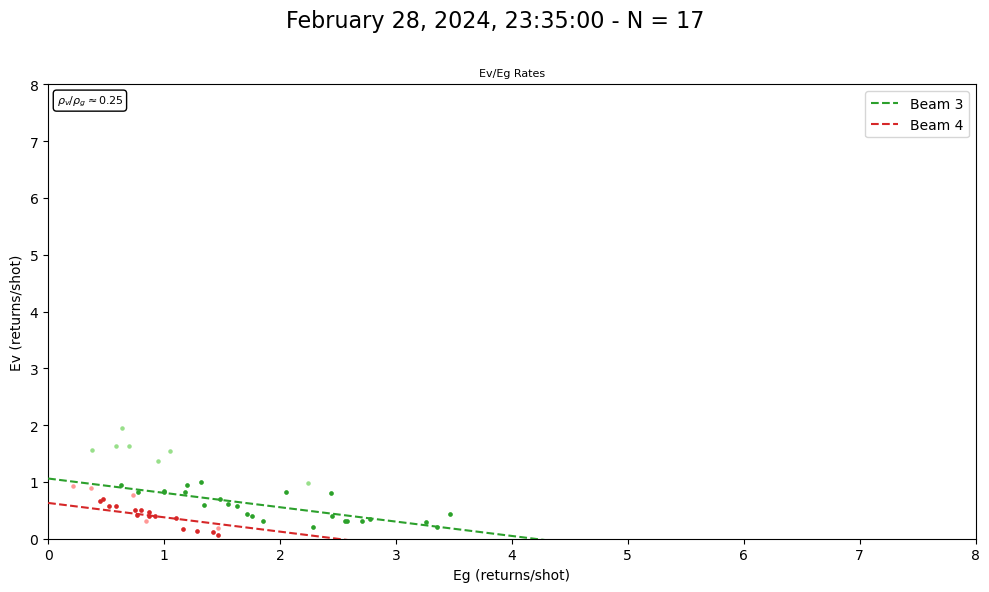

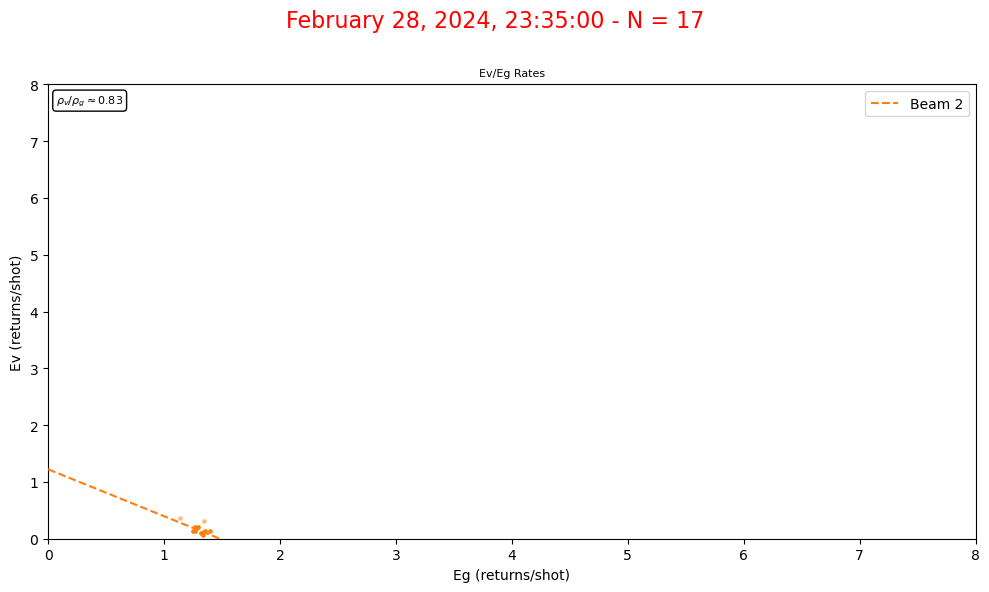

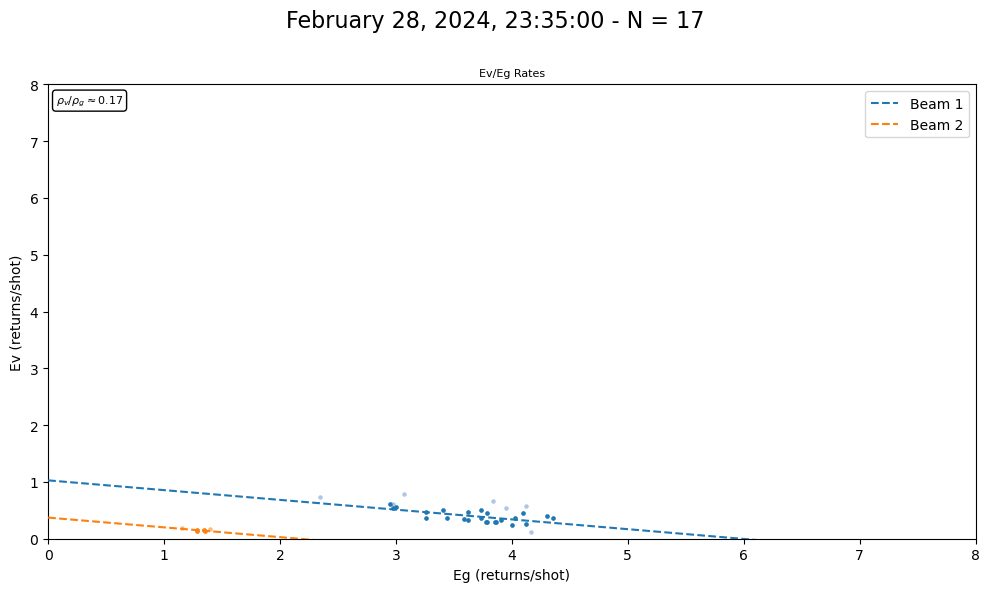

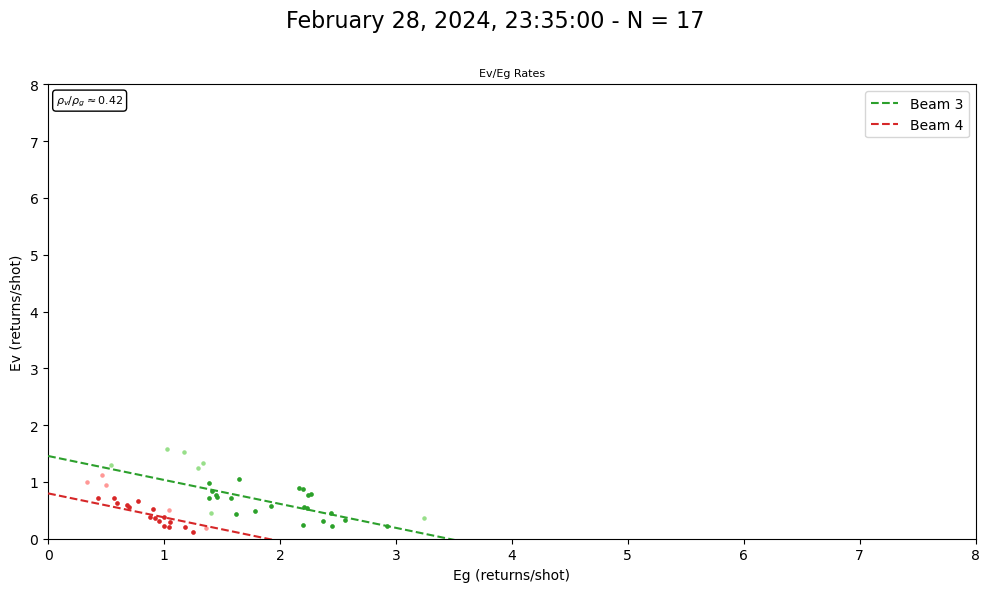

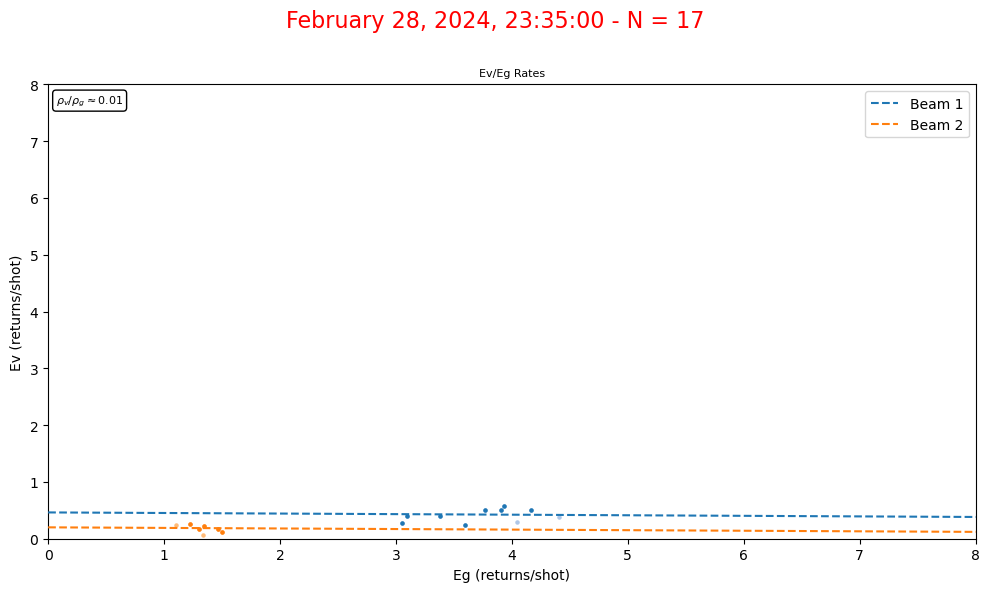

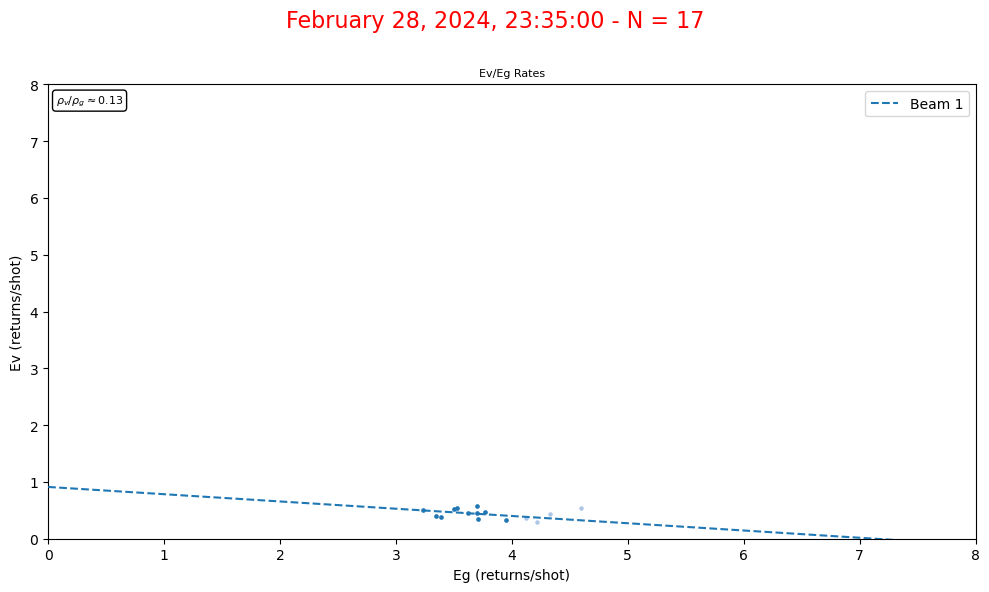

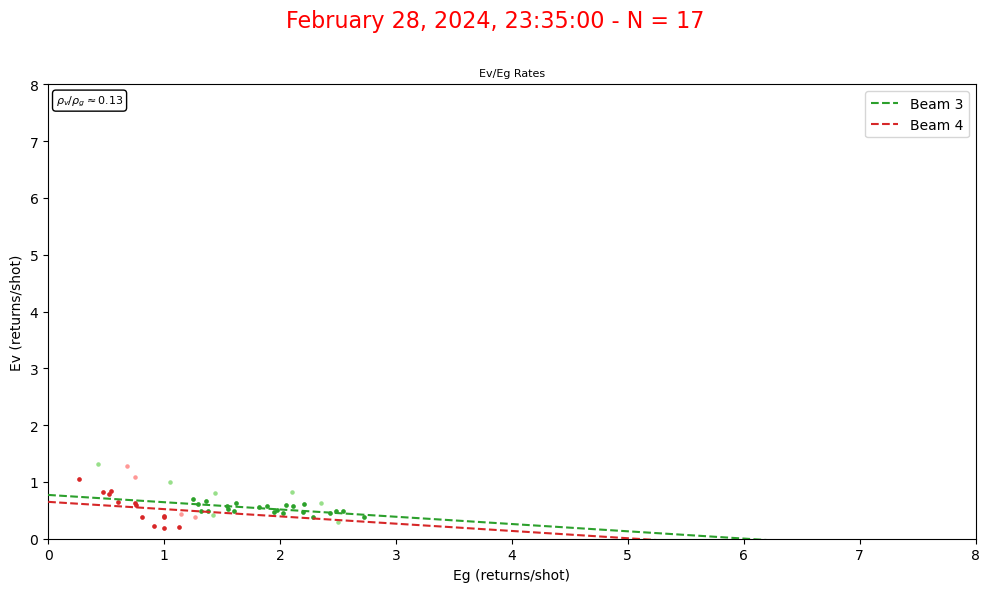

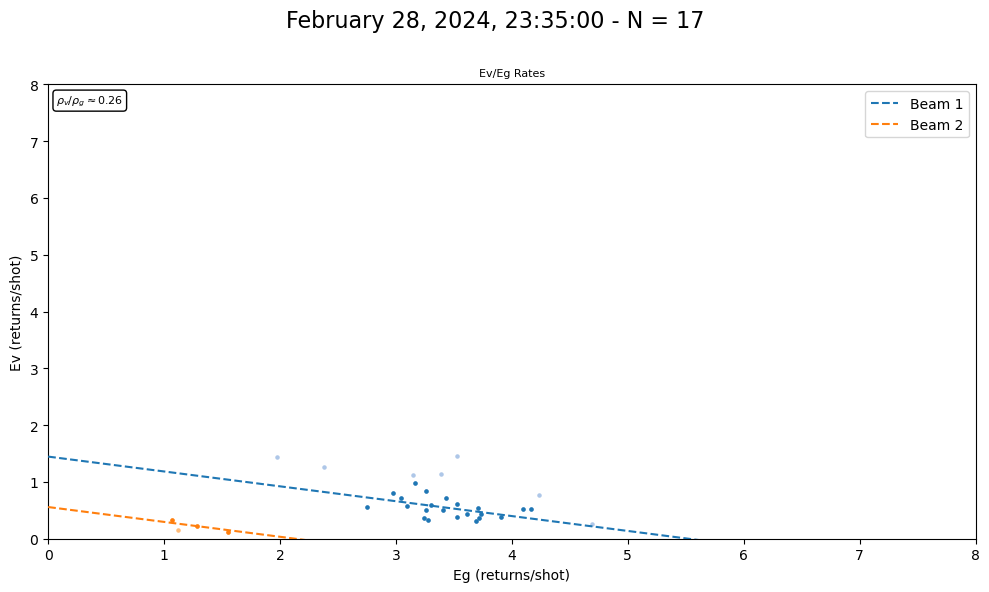

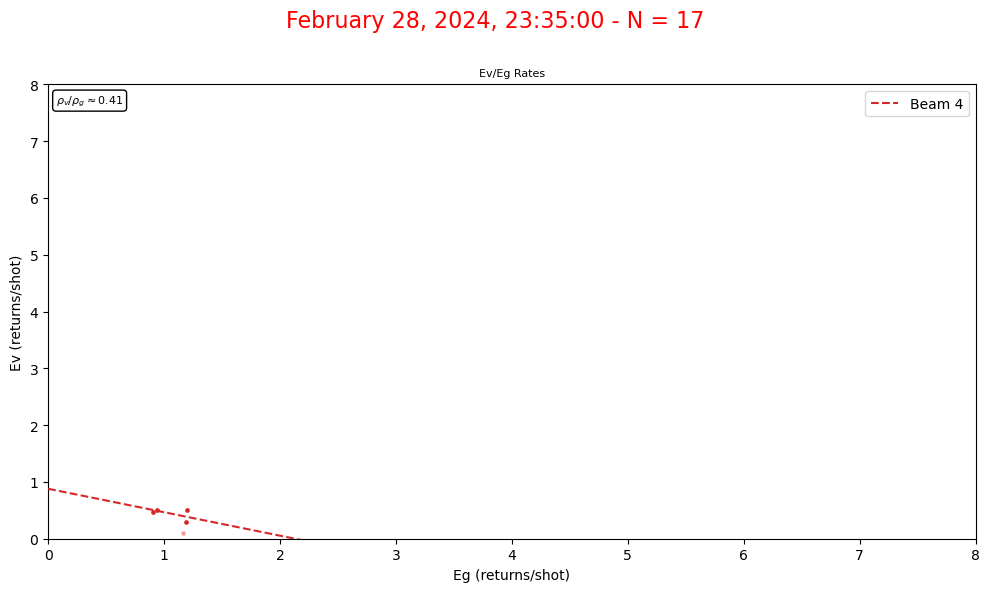

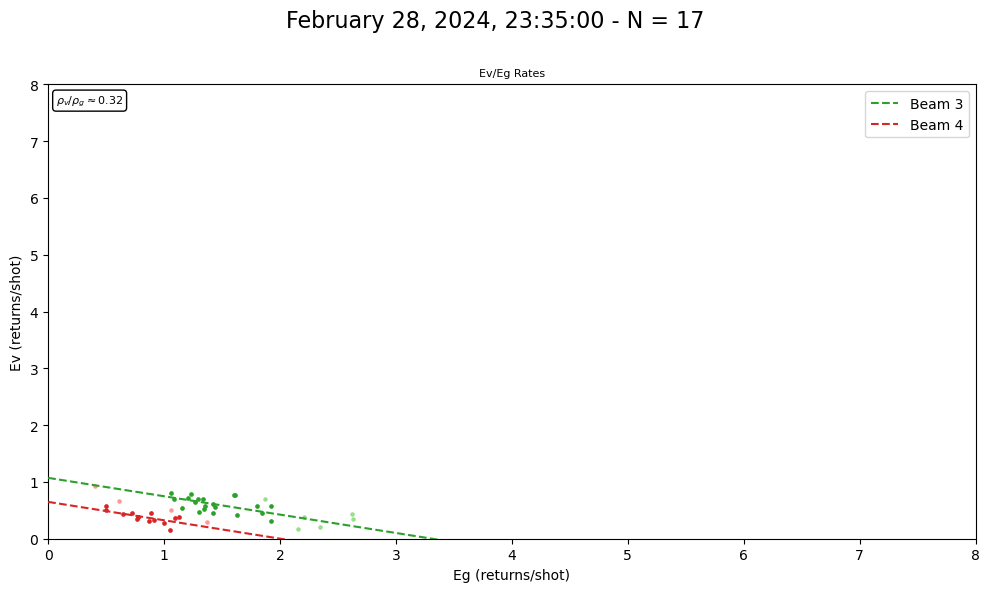

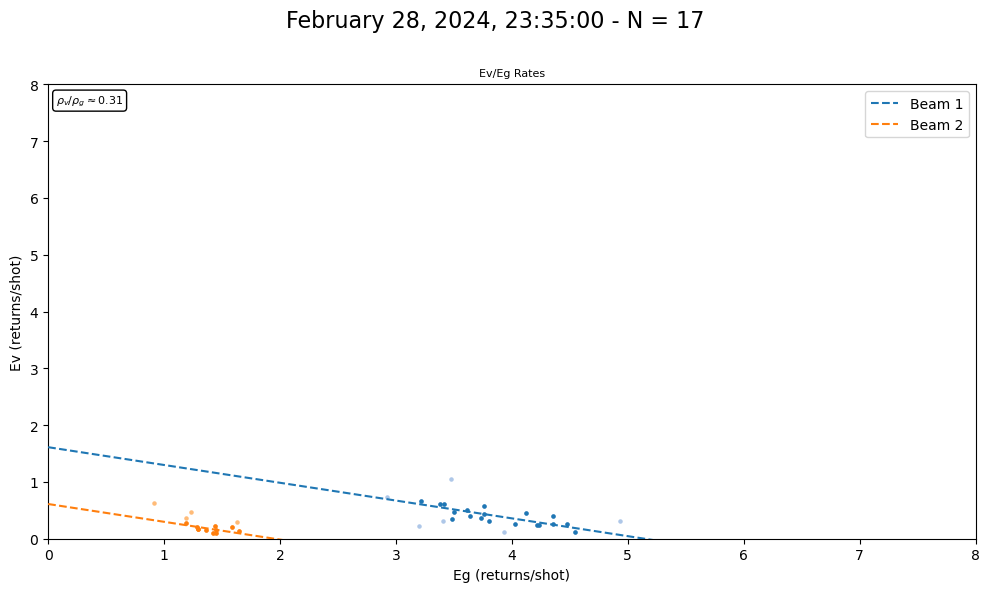

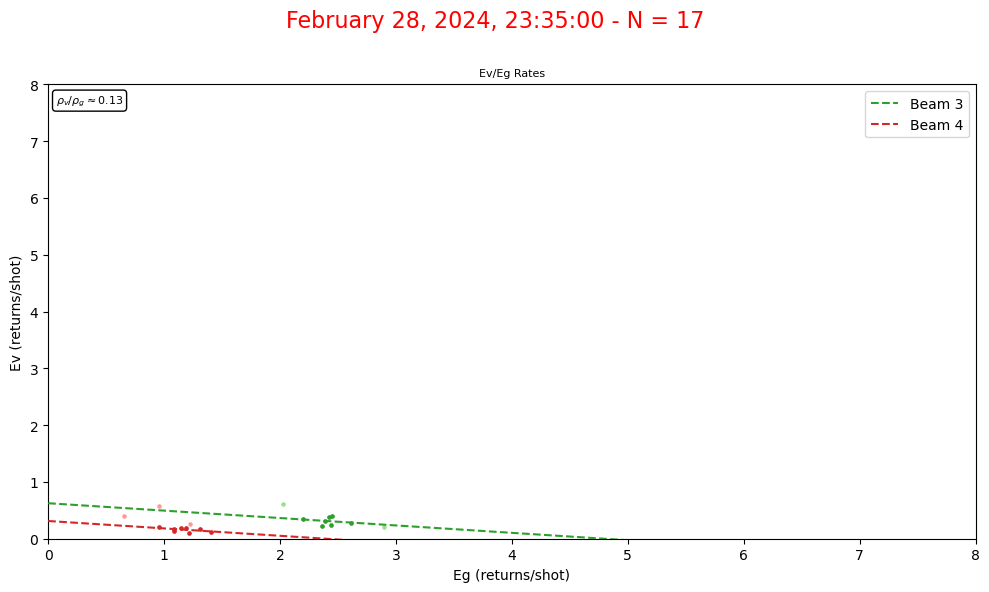

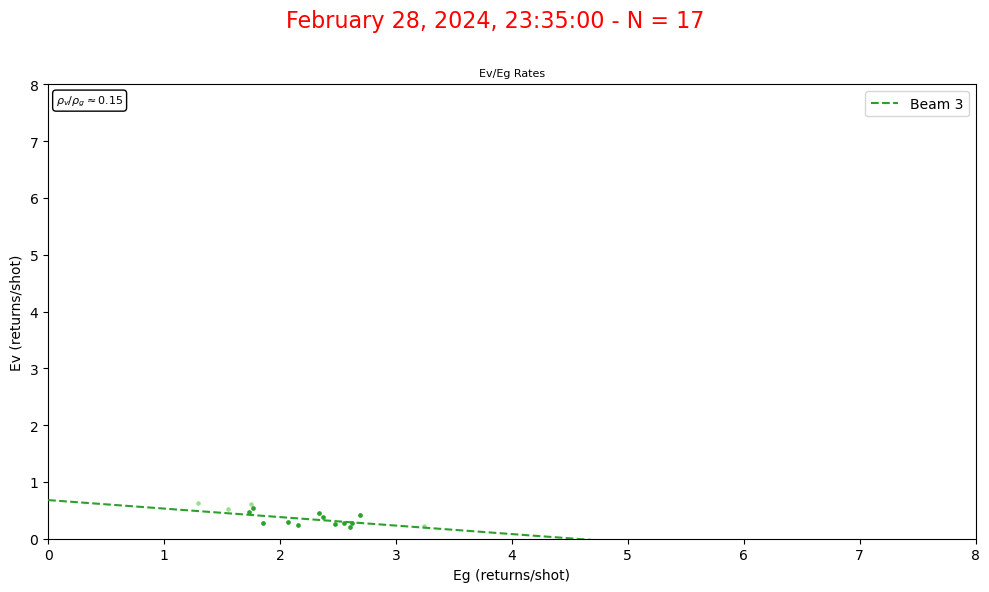

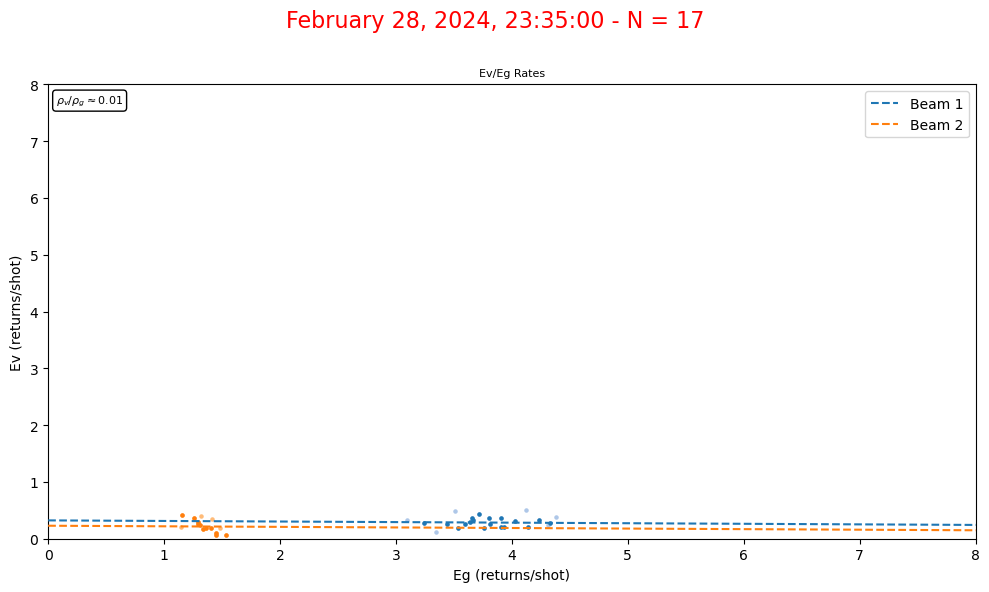

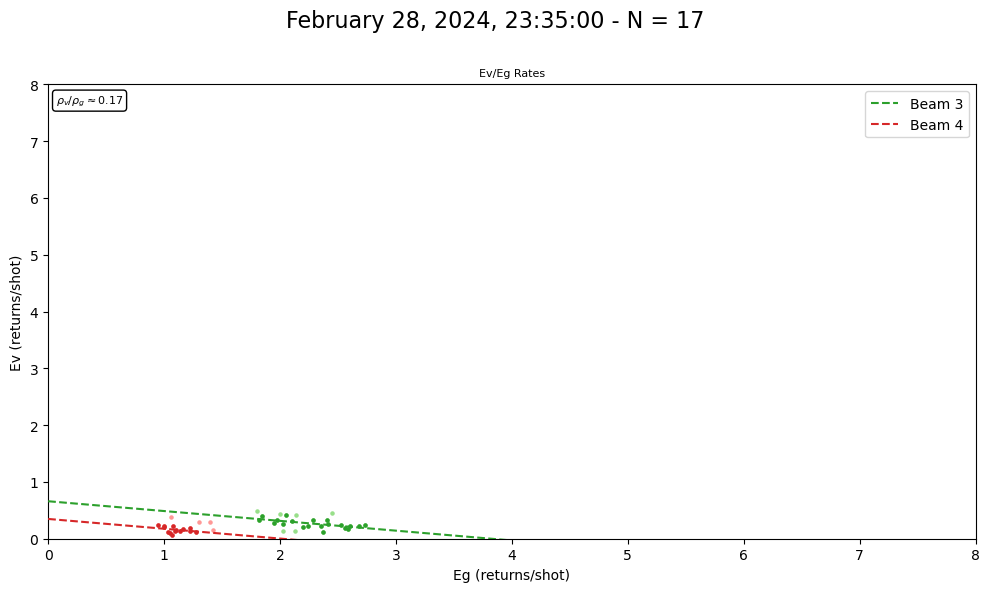

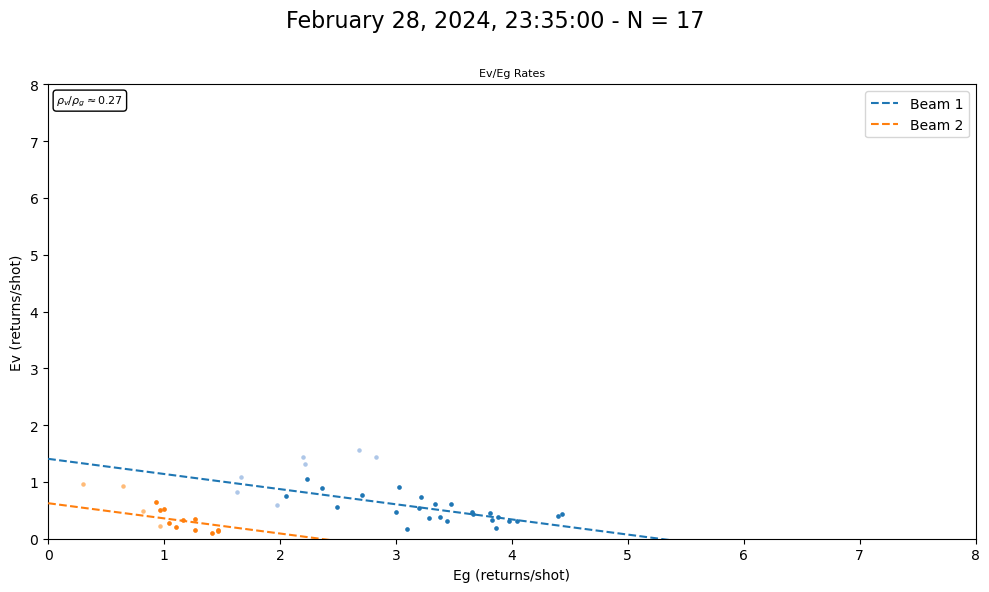

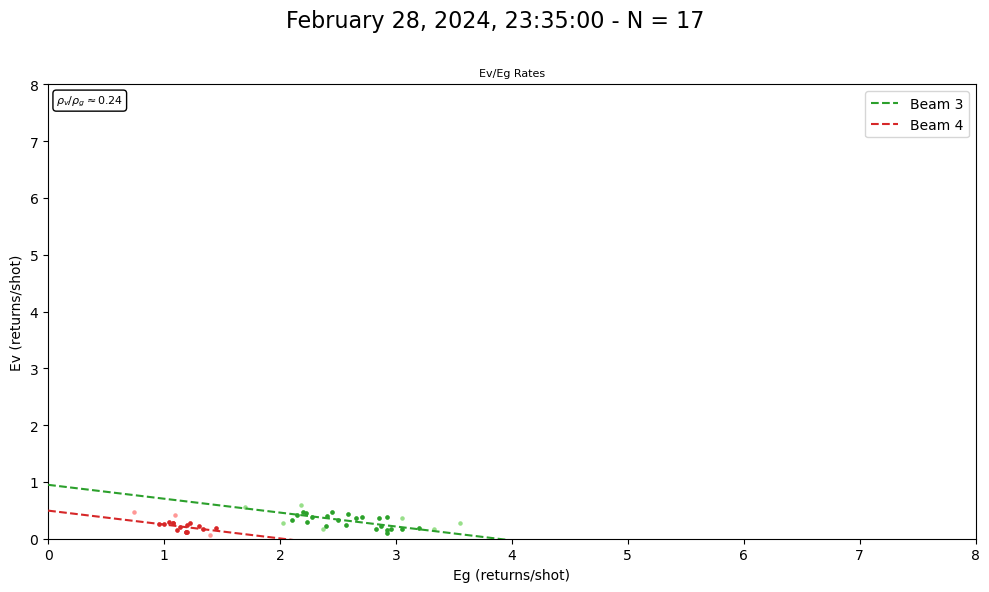

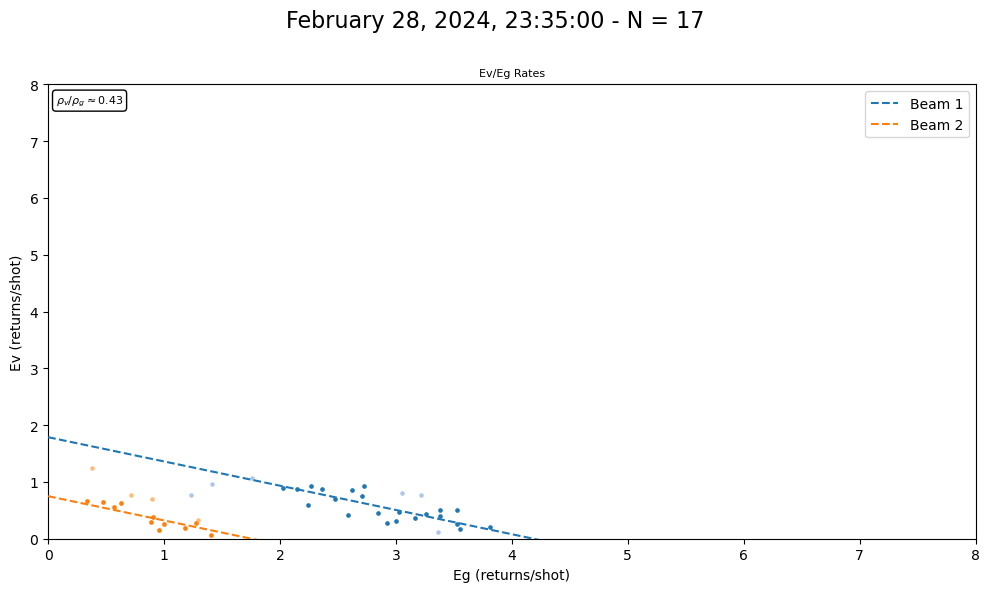

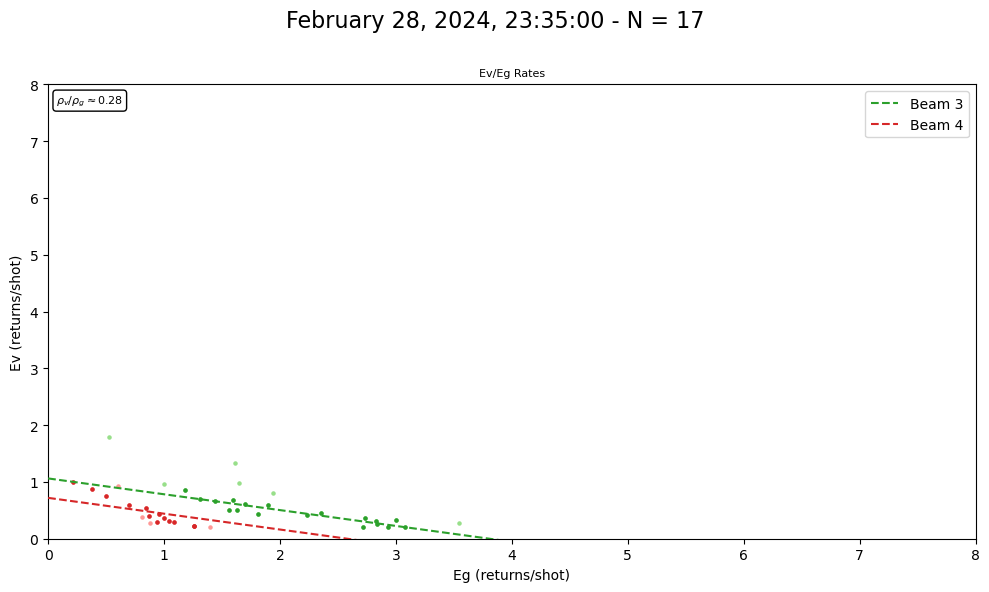

In [1]:
from scripts.parallel_blocks import *

dirpath = '../scratch/data/willowcreek/'

all_ATL03, all_ATL08, failed_ATL03 = track_pairs(dirpath, failed=True)
N = len(all_ATL03)
print(N-1)

coords = (-90.0791, 45.8060)

for i in [17]:#range(N):
    data = pvpg_parallel(dirpath, all_ATL03[i], all_ATL08[i], coords=coords, width=4,height=4,file_index=i, alt_thresh=80,\
                         altitude=521, threshold=3, small_box=1, graph_detail=1, loss='linear', rebinned=30, f_scale=.05,\
                         outlier_removal=0.22,method='normal', landcover='forest', trim_atmospheric=True)
    # print(data)